In [33]:
import numpy as  np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/
1) Data Exploration – finding out more about the data we have(By Using Pandas)
2) Data Munging – cleaning the data and playing with it to make it better suit statistical modeling
3) Predictive Modeling – running the actual algorithms and having fun 

Workflow stages of Any Data Science Projects:https://www.kaggle.com/startupsci/titanic-data-science-solutions

EDA(Exploritory Data Analysis):

1) Explore all Data and try to Analygize between Dependent and Independent variables.How independent veraibles are depends on Dependent Variabls.In titanic project Servival is Dependent Variabls and Others are variabls are indepennt.
2) Find the Discreate and Continious variabls and try to figure out the relationship betwwen both.
3) Try to go in deeper again in specfic variabls which is highely and really depend on Servival rate.Try to find null values in all vaiables
4) We need to know all veriables Data Types. 

In [34]:
# We have to analygize the all data set (in terma of dependent and independent veriables )
titanic_df = pd.read_csv("train.csv")

In [35]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
# This is the subtitute of below isnull() entries.
# According to me Sex>Age>Pclass>=Cabin>Embarked is higly depend on Servivl of a person
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [37]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
titanic_df.describe(include=['O']) # Categorical column

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goldschmidt, Mr. George B",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [39]:
titanic_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [40]:
titanic_df["Survived"].isnull().sum() # Total number of person whoes servived is not null

0

In [41]:
titanic_df["Age"].isnull().sum()

177

In [42]:
titanic_df["Pclass"].isnull().sum()

0

In [43]:
titanic_df["Name"].isnull().sum()

0

In [44]:
titanic_df["Sex"].isnull().sum()

0

In [45]:
titanic_df["SibSp"].isnull().sum()

0

In [46]:
titanic_df["Parch"].isnull().sum()

0

In [47]:
titanic_df["Embarked"].isnull().sum()

2

In [48]:
titanic_df["Age"].isnull().sum() # We can see 177 Values are null in age which is really importent factor for survival

177

In [49]:
# Fill all values of Age with mean (Avarage Values )

titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df.Age.mean())

In [50]:
titanic_df["Age"].isnull().sum() # Now we can see there is no null values for the Age Entries

0

In [51]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [52]:
titanic_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [53]:
titanic_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [54]:
titanic_df[["Parch","Survived"]].groupby(["Parch"]).mean().sort_values(by="Survived",ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [55]:
titanic_df[["Parch","Survived"]].groupby(["Parch"]).mean().sort_values(by="Survived",ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [56]:
titanic_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

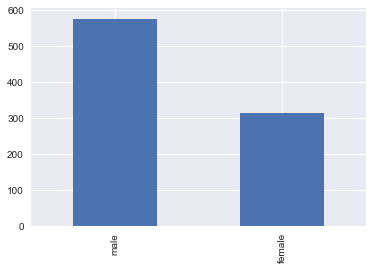

In [57]:
titanic_df.Sex.value_counts().plot(kind="bar")

In [58]:
titanic_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

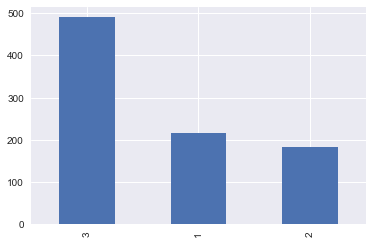

In [59]:
titanic_df["Pclass"].value_counts().plot(kind="bar")

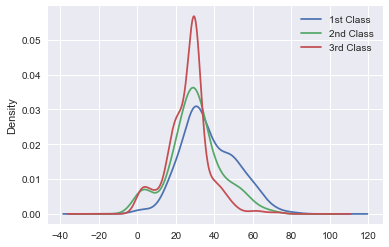

In [60]:
titanic_df.Age[titanic_df.Pclass == 1].plot(kind='kde')    
titanic_df.Age[titanic_df.Pclass == 2].plot(kind='kde')
titanic_df.Age[titanic_df.Pclass == 3].plot(kind='kde')
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

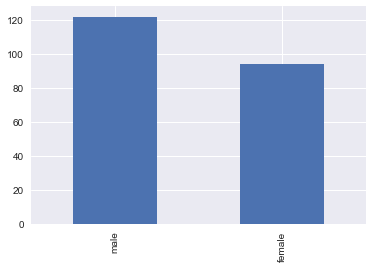

In [61]:
titanic_df.Sex[titanic_df.Pclass == 1].value_counts().plot(kind="bar")
#titanic_df.Sex[titanic_df.Pclass == 2].value_counts().plot(kind="bar")
#titanic_df.Sex[titanic_df.Pclass == 3].value_counts().plot(kind="bar")

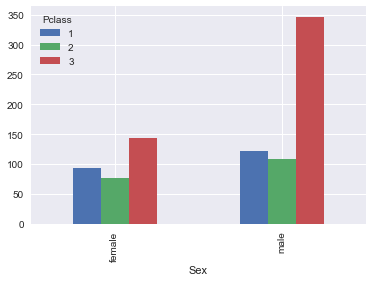

In [62]:
titanic_df.groupby(['Sex', 'Pclass']).size().unstack().plot(kind="bar")

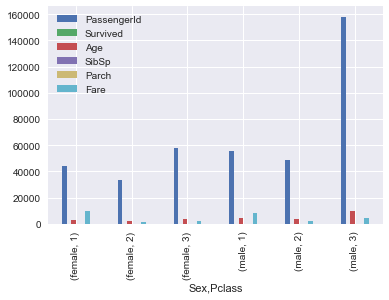

In [63]:
titanic_df.groupby(['Sex', 'Pclass']).sum().plot(kind="bar")

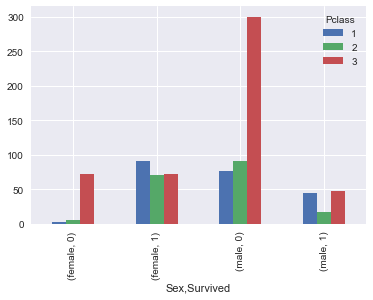

In [64]:
titanic_df.groupby(['Sex', 'Survived','Pclass']).size().unstack().plot(kind="bar")

In [69]:
categorical = titanic_df.dtypes[titanic_df.dtypes == "object"].index
print(categorical)

titanic_df[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goldschmidt, Mr. George B",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [70]:
titanic_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goldschmidt, Mr. George B",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [73]:
titanic_df.describe(include=["o"])

TypeError: data type "o" not understood